Este colab fue desarrollado por Arnold Charry Armero.

# WYNDOR GLASS CO

La WYNDOR GLASS CO. produce artículos de vidrio de alta calidad, entre ellos ventanas y
puertas de vidrio. Tiene tres plantas. Los marcos y molduras de aluminio se hacen en la planta 1,
los de madera en la planta 2; la 3 produce el vidrio y ensambla los productos.
Debido a una reducción de las ganancias, la alta administración ha decidido reorganizar la
línea de producción de la compañía. Se discontinuarán varios productos no rentables y se dejará
libre una parte de la capacidad de producción para emprender la fabricación de dos productos
nuevos cuyas ventas potenciales son muy prometedoras:
1. Producto 1: una puerta de vidrio de 8 pies con marco de aluminio
Producto 2: una ventana corrediza con marco de madera de 4 por 6 pies
El producto 1 requiere parte de la capacidad de producción en las plantas 1 y 3 y nada en la planta
2. El producto 2 sólo necesita trabajo en las plantas 2 y 3. La división de comercialización ha concluido que la compañía puede vender todos los productos que se puedan fabricar en las plantas. Sin
embargo, como ambos productos competirían por la misma capacidad de producción en la planta 3,
no está claro cuál mezcla de productos sería la más rentable. Por lo tanto, se ha formado un equipo
de IO para estudiar este problema

Obteniendo los siguientes datos,

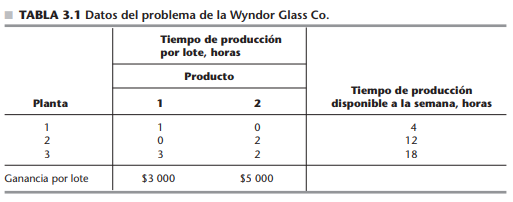

Para formular así el siguiente modelo matemático,

$$ \textrm{Max } z = 3x_{1} + 5x_{2} $$

$ \textrm{s.a.} $

$$ x_{1} \leq 4 $$

$$ 2x_{2} \leq 12 $$

$$ 3x_{1}+2x_{2} \leq 18 $$

$$ x_{1} \geq 0 $$

$$ x_{2} \geq 0 $$


In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 25.0 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [3]:
model = LpProblem(name = "Giapetto's_Problem", sense = LpMaximize)

#Inicialización de las variables de decisión
X1 = LpVariable('X1', 0, None, LpInteger)
X2 = LpVariable('X2', 0, None, LpInteger)

model += 3 * X1 + 5 * X2, "Función Objetivo"

model += X1 <= 4
model += 2 * X2 <= 12
model += 3 * X1 + 2 * X2 <= 18

#Se resuelve el modelo
model.solve()

#Se imprime el status del problema
print("Status", LpStatus[model.status])

#Se imprimen las variables
for v in model.variables():
  print(v.name, "=", v.varValue)

print("Función Objetivo =", value(model.objective))

Status Optimal
X1 = 2.0
X2 = 6.0
Función Objetivo = 36.0


<function matplotlib.pyplot.show(close=None, block=None)>

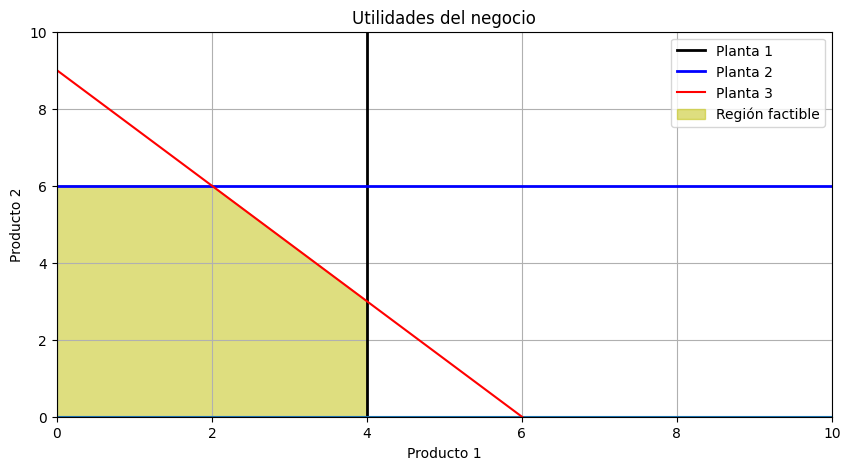

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))
x = np.arange(0, 100, 1)
y = np.arange(0, 100, 1)
plt.axvline(x=4, color='k', linestyle='-', linewidth=2, label= 'Planta 1')
plt.axhline(y=6, color='b', linestyle='-', linewidth=2, label='Planta 2')
y2 = (18 - 3*x)/2

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.hlines(0, xmin=0, xmax=10)
plt.vlines(0, ymin=0, ymax=10)
plt.grid(True)

plt.xlabel('Producto 1')
plt.ylabel('Producto 2')
plt.title('Utilidades del negocio')

plt.plot(x, y2, label='Planta 3', color = 'r')

x = [0, 0, 2, 4, 4]
y = [0, 6, 6, 3, 0]
plt.fill(x, y, color = 'y', alpha = 0.5, label='Región factible')
plt.legend()
plt.show